# Project 4: Wrangle and Analyze `WeRateDogs` Twitter Data

_______________________________________________________________________________________________________________________________

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import requests
import json
import tweepy
from timeit import default_timer as timer

import matplotlib.pyplot as plt
%matplotlib inline

_______________________________________________________________________________________________________________________________

## Gathering Data

### 1. The Twitter Archive Data

In [2]:
# load and read the data
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 2. The Tweet Image Predictions Data

In [3]:
# load the data from HTTP link
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

> HTTP status code **200** means the request has succeeded.

In [4]:
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

In [5]:
# read the data and put it into dataframe
df_image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 3. The Retweet/Favorite(like) count Data

In [6]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [7]:
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_twitter_archive['tweet_id'].values
len(tweet_ids)

2356

In [9]:
# Note: This code provided by Udacity
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Rate limit reached. Sleeping for: 416


Fail
902: 758474966123810816
Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success
931: 754449512966619136
Success
932: 754120377874386944
Success
933

Rate limit reached. Sleeping for: 416


Fail
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
1831: 676219687039057920
Success
1832: 676215927814406144
Success
1833:

In [10]:
df_list = []

with open('tweet_json.txt', 'r', encoding='utf8') as file:
    for line in file:
        lines = json.loads(line)
        df_list.append({'tweet_id': lines['id'],
                        'likes': lines['favorite_count'],
                        'retweets': lines['retweet_count'],})
        
df_twitter_api = pd.DataFrame(df_list, columns=['tweet_id','likes','retweets'])

In [11]:
df_twitter_api.head()

,tweet_id,likes,retweets
0,892420643555336193,36092,7687
1,892177421306343426,31128,5683
2,891815181378084864,23439,3770
3,891689557279858688,39377,7853
4,891327558926688256,37611,8455


_______________________________________________________________________________________________________________________________

## Assessing Data

### 1. The Twitter Archive Data

In [12]:
df_twitter_archive.shape

(2356, 17)

In [13]:
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [14]:
df_twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [15]:
df_twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1086,738166403467907072,NaN,NaN,2016-06-02 00:32:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Axel. He's a professional leaf catcher...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/738166403...,12,10,Axel,None,None,None,None
539,806576416489959424,NaN,NaN,2016-12-07 19:09:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Hooman catch successful. Massive hit by dog. F...,NaN,NaN,NaN,https://twitter.com/deadspin/status/8065709331...,13,10,None,None,None,None,None
2235,668171859951755264,NaN,NaN,2015-11-21 20:59:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Trans Siberian Kellogg named Alfonso...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668171859...,7,10,a,None,None,None,None
13,889638837579907072,NaN,NaN,2017-07-25 00:10:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ted. He does his best. Sometimes that'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889638837...,12,10,Ted,None,None,None,None
1671,682393905736888321,NaN,NaN,2015-12-31 02:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kreg. He's riding an invisible jet ski...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682393905...,11,10,Kreg,None,None,None,None
1166,722613351520608256,NaN,NaN,2016-04-20 02:30:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Schnitzel. He's a Tropicana Floofboop. Ge...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722613351...,12,10,Schnitzel,None,None,None,None
727,782305867769217024,NaN,NaN,2016-10-01 19:47:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sampson. He just graduated. Ready to b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/782305867...,12,10,Sampson,doggo,None,None,None
1109,733828123016450049,NaN,NaN,2016-05-21 01:13:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Terry. The harder you hug him the fart...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/733828123...,10,10,Terry,None,None,None,None
2315,666691418707132416,NaN,NaN,2015-11-17 18:56:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Christoper. He is a spotted Penne. Can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666691418...,8,10,Christoper,None,None,None,None
1257,710296729921429505,NaN,NaN,2016-03-17 02:48:31 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Oshie. 12/10 please enjoy (vid by @cat...,NaN,NaN,NaN,https://vine.co/v/iw9hUFAMerV,12,10,Oshie,None,None,None,None


In [16]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [17]:
df_twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [18]:
df_twitter_archive.duplicated().sum()

0

In [19]:
df_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [20]:
df_twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [23]:
df_twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [24]:
df_twitter_archive.query('rating_denominator != 10')['rating_denominator'].count()

23

In [25]:
df_twitter_archive['name'].value_counts().head(20)

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Tucker      10
Lola        10
Penny       10
Winston      9
Bo           9
Sadie        8
the          8
Daisy        7
Bailey       7
Buddy        7
an           7
Toby         7
Jack         6
Milo         6
Name: name, dtype: int64

In [26]:
non_capitalized_name = df_twitter_archive.loc[(df_twitter_archive['name'].str.islower())].name.value_counts()
non_capitalized_name

a               55
the              8
an               7
very             5
quite            4
just             4
one              4
actually         2
mad              2
getting          2
not              2
by               1
life             1
incredibly       1
his              1
this             1
infuriating      1
all              1
unacceptable     1
old              1
officially       1
light            1
such             1
space            1
my               1
Name: name, dtype: int64

In [27]:
df_twitter_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [28]:
print(df_twitter_archive['doggo'].value_counts())
print(df_twitter_archive['floofer'].value_counts())
print(df_twitter_archive['pupper'].value_counts())
print(df_twitter_archive['puppo'].value_counts())

None     2259
doggo      97
Name: doggo, dtype: int64
None       2346
floofer      10
Name: floofer, dtype: int64
None      2099
pupper     257
Name: pupper, dtype: int64
None     2326
puppo      30
Name: puppo, dtype: int64


> ### Quality issues:
- There are 78 replies in **`in_reply_to_status_id`** are unuseful for our analysis as our focus is only on the orginal tweets (No replies), so should be removed.
- There are 181 retweets **`retweeted_status_id`** unuseful for our analysis as our focus is only on the orginal tweets (No retweets), so should be removed.
- **`timestamp`** column has string datatype (should be changed to "Date" datatype).
- There are 23 of ratings in **`rating_denominator`** not equal 10 and some of them not properly extracted from the text of tweets, so we will remove these tweets in order to improve the data in this column.
- There are some "float" ratings in **`rating_numerator`** are incorrectly extracted from the text of the tweet, so we should convert this column from int to float, then reextract the rating.
- In **`name`** column, all names almost are capitalized, but there are a few names non-capitalized which are not valid names such as "a, the, an, very... etc".
- We have 745 of "None" values in **`name`** column which we can't clean it.
- In the **`source`** column, we can change the data from HTML structure "<\a>" to string in order to make the data more clearly, since we only have 4 sources.

> ### Tidiness issues:
- Drop unuseful columns.
- Dogs classifications `doggo`, `floofer`, `pupper` and `puppo` should be combined in one column.

### 2. The Tweet Image Predictions Data

In [29]:
df_image_predictions.shape

(2075, 12)

In [30]:
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [31]:
df_image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [32]:
df_image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1522,788070120937619456,https://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg,1,golden_retriever,0.735163,True,Sussex_spaniel,0.064897,True,Labrador_retriever,0.047704,True
1982,871762521631449091,https://pbs.twimg.com/media/DBkfY58XcAEdzZy.jpg,2,Labrador_retriever,0.921393,True,golden_retriever,0.064608,True,bloodhound,0.003383,True
15,666099513787052032,https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg,1,Lhasa,0.582330,True,Shih-Tzu,0.166192,True,Dandie_Dinmont,0.089688,True
37,666454714377183233,https://pbs.twimg.com/media/CT-5Bs-WUAA2JeC.jpg,1,dalmatian,0.278954,True,Labrador_retriever,0.237612,True,Great_Pyrenees,0.171106,True
952,705066031337840642,https://pbs.twimg.com/media/CcjlzRkW0AMqmWg.jpg,1,Airedale,0.868658,True,Irish_terrier,0.027587,True,otterhound,0.025324,True
1171,736365877722001409,https://pbs.twimg.com/media/CjgYyuvWkAAHU8g.jpg,3,cup,0.473555,False,toy_poodle,0.082606,True,consomme,0.048298,False
859,696894894812565505,https://pbs.twimg.com/media/CaveNQcVIAECyBr.jpg,1,Appenzeller,0.665628,True,beagle,0.104795,True,Greater_Swiss_Mountain_dog,0.067868,True
1051,713919462244790272,https://pbs.twimg.com/media/CehZ9mLWsAAsn28.jpg,1,Siberian_husky,0.463223,True,Eskimo_dog,0.389959,True,malamute,0.097963,True
1888,848212111729840128,https://pbs.twimg.com/media/C8V0aI5V0AAgO9m.jpg,1,Bedlington_terrier,0.333486,True,Ibizan_hound,0.245797,True,wallaby,0.131647,False
200,669680153564442624,https://pbs.twimg.com/media/CUsuijgXAAE4pdi.jpg,1,dalmatian,0.141257,True,borzoi,0.137744,True,Labrador_retriever,0.103792,True


In [33]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [34]:
df_image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [35]:
df_image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [36]:
df_image_predictions['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [37]:
df_image_predictions['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [38]:
df_image_predictions['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [39]:
df_image_predictions.duplicated().sum()

0

> ### Quality issues:
- There are formating problems (underscores and lowercase letter) in `p1`, `p2` and `p3`, we have to improve it in order to make it In one format.

> ### Tidiness issues:
- Most of the columns should be renamed to more clearly names.
- Image predictions dataset should be combiend/merged with the twitter archive dataset.

### 3. The Retweet/Favorite(like) count Data

In [40]:
df_twitter_api.shape

(2329, 3)

In [41]:
df_twitter_api.head()

,tweet_id,likes,retweets
0,892420643555336193,36092,7687
1,892177421306343426,31128,5683
2,891815181378084864,23439,3770
3,891689557279858688,39377,7853
4,891327558926688256,37611,8455


In [42]:
df_twitter_api.tail()

,tweet_id,likes,retweets
2324,666049248165822465,96,40
2325,666044226329800704,272,131
2326,666033412701032449,112,41
2327,666029285002620928,121,42
2328,666020888022790149,2408,460


In [43]:
df_twitter_api.sample(10)

,tweet_id,likes,retweets
363,827933404142436356,20214,5288
1508,689999384604450816,1410,367
1471,692530551048294401,1815,411
741,778383385161035776,5900,1119
1641,682697186228989953,1313,356
2326,666033412701032449,112,41
1750,677961670166224897,3363,1658
965,748705597323898880,2780,947
1188,715220193576927233,2395,641
425,819711362133872643,13512,3158


In [44]:
df_twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2329 entries, 0 to 2328
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tweet_id  2329 non-null   int64
 1   likes     2329 non-null   int64
 2   retweets  2329 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [45]:
df_twitter_api.describe()

,tweet_id,likes,retweets
count,2.329000e+03,2329.000000,2329.000000
mean,7.419285e+17,7540.197939,2698.440962
std,6.824683e+16,11704.293113,4561.432337
min,6.660209e+17,0.000000,1.000000
25%,6.782786e+17,1313.000000,546.000000
50%,7.182469e+17,3277.000000,1265.000000
75%,7.986731e+17,9234.000000,3144.000000
max,8.924206e+17,155672.000000,77572.000000


In [46]:
df_twitter_api.isnull().sum()

tweet_id    0
likes       0
retweets    0
dtype: int64

In [47]:
df_twitter_api.duplicated().sum()

0

> ### Quality issues:
The data seems clean, I didn't find any quality issues.

> ### Tidiness issues:
- Twitter API dataset should be combined/merged with the previous two datasets.

_______________________________________________________________________________________________________________________________

## Cleaning Data

### 1. The Twitter Archive Data

In [222]:
# create a copy of twitter archive dataframe
df_twitter_archive_clean = df_twitter_archive.copy()

### Quality Issues

> **There are 78 replies in `in_reply_to_status_id` are unuseful for our analysis as our focus is only on the orginal tweets (No replies), so should be removed.**

#### Define

Remove reply rows

#### Code

In [223]:
df_twitter_archive_clean.drop(df_twitter_archive_clean[df_twitter_archive_clean['in_reply_to_status_id'].notnull()].index,
                              inplace = True)
df_twitter_archive_clean.reset_index(drop=True, inplace=True)

#### Test

In [224]:
df_twitter_archive_clean['in_reply_to_status_id'].notnull().sum()

0

_______________________________________________________________________________________________________________________________

> **There are 181 retweets `retweeted_status_id` unuseful for our analysis as our focus is only on the orginal tweets (No retweets), so should be removed.**

#### Define

Remove retweet rows

#### Code

In [225]:
df_twitter_archive_clean.drop(df_twitter_archive_clean[df_twitter_archive_clean['retweeted_status_id'].notnull()].index,
                              inplace = True)
df_twitter_archive_clean.reset_index(drop=True, inplace=True)

#### Test

In [226]:
df_twitter_archive_clean['retweeted_status_id'].notnull().sum()

0

In [227]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

_______________________________________________________________________________________________________________________________

> **`timestamp` column has string datatype (should be changed to "Date" datatype).**

#### Define

Convert `timestamp` column to date datatype, but before we convert it, we will remove `+0000` (UTC).

#### Code

In [228]:
# remove UTC and spaces using string slicing
df_twitter_archive_clean['timestamp'] = df_twitter_archive_clean['timestamp'].str[:-6]

In [229]:
df_twitter_archive_clean['timestamp'] = pd.to_datetime(df_twitter_archive_clean.timestamp)

#### Test

In [230]:
df_twitter_archive_clean['timestamp'].head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

In [231]:
df_twitter_archive_clean.dtypes

tweet_id                               int64
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp            object
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

_______________________________________________________________________________________________________________________________

> **There are 23 of ratings in `rating_denominator` not equal 10 and some of them not properly extracted from the text of tweets, so we will remove these tweets in order to improve the data in this column.**

#### Define

Remove any row that **doesn't equal 10** in `rating_denominator` column

#### Code

In [232]:
df_twitter_archive_clean = df_twitter_archive_clean.query('rating_denominator == 10')

#### Test

In [233]:
df_twitter_archive_clean.query('rating_denominator != 10')['rating_denominator'].count()

0

In [234]:
df_twitter_archive_clean['rating_denominator'].value_counts()

10    2080
Name: rating_denominator, dtype: int64

_______________________________________________________________________________________________________________________________

> **There are some "float" ratings in `rating_numerator` are incorrectly extracted from the text of the tweet, so we should convert this column from int to float, then reextract the rating**

#### Define

Convert `rating_numerator` datatype from int to float, then reextract rating

#### Code

In [235]:
df_twitter_archive_clean['rating_numerator'] = df_twitter_archive_clean['rating_numerator'].astype(float)

In [236]:
df_twitter_archive_clean[df_twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

C:\Users\ABDULRAHMAN\Anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator
41,This is Bella. She hopes her smile made you sm...,5.0
528,"This is Logan, the Chow who lived. He solemnly...",75.0
586,This is Sophie. She's a Jubilant Bush Pupper. ...,27.0
1474,Here we have uncovered an entire battalion of ...,26.0


In [237]:
# display the text to get right rating "visually"
print(df_twitter_archive_clean['text'][41])
print(df_twitter_archive_clean['text'][528])
print(df_twitter_archive_clean['text'][586])
print(df_twitter_archive_clean['text'][1474])

This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD


In [238]:
df_twitter_archive_clean['rating_numerator'][41] = df_twitter_archive_clean['rating_numerator'][41] = 13.5
df_twitter_archive_clean['rating_numerator'][528] = df_twitter_archive_clean['rating_numerator'][528] = 9.75
df_twitter_archive_clean['rating_numerator'][586] = df_twitter_archive_clean['rating_numerator'][586] = 11.27
df_twitter_archive_clean['rating_numerator'][1474] = df_twitter_archive_clean['rating_numerator'][1474] = 11.26

C:\Users\ABDULRAHMAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ABDULRAHMAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ABDULRAHMAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipyk

#### Test

In [239]:
df_twitter_archive_clean['rating_numerator'].dtypes

dtype('float64')

In [240]:
df_twitter_archive_clean[df_twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

C:\Users\ABDULRAHMAN\Anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator
41,This is Bella. She hopes her smile made you sm...,13.50
528,"This is Logan, the Chow who lived. He solemnly...",9.75
586,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27
1474,Here we have uncovered an entire battalion of ...,11.26


In [243]:
df_twitter_archive_clean.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
593,776218204058357768,NaN,NaN,2016-09-15 00:36:55,"<a href=""http://twitter.com/download/iphone"" r...",Atlas rolled around in some chalk and now he's...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776218204...,13.0,10,None,None,floofer,None,None


_______________________________________________________________________________________________________________________________

> **In `name` column, all names almost are capitalized, but there are a few names non-capitalized which are not valid names such as "a, the, an, very... etc".**

#### Define

Replace all non-capitalized names with "None" in `name` column.

#### Code

In [244]:
df_twitter_archive_clean['name'].loc[(df_twitter_archive_clean['name'].str.islower())] = "None"

C:\Users\ABDULRAHMAN\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


#### Test

In [245]:
df_twitter_archive_clean['name'].value_counts()

None       693
Lucy        11
Charlie     11
Oliver      10
Cooper      10
          ... 
Arlo         1
Mabel        1
Reagan       1
Moofasa      1
Devón        1
Name: name, Length: 928, dtype: int64

In [246]:
df_twitter_archive_clean['name'].count()

2080

In [247]:
df_twitter_archive_clean['name'].str.islower().sum()

0

_______________________________________________________________________________________________________________________________

> **In the `source` column, we can change the data from HTML structure "<\a>" to string in order to make the data more clearly, since we only have 4 sources.**

#### Define

Replace HTML structure with string in `source` column. 

#### Code

In [248]:
df_twitter_archive_clean.replace({'source' : { 
'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>' : 'Twitter for iPhone', 
'<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>' : 'Vine - Make a Scene', 
'<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>' : 'Twitter Web Client', 
'<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>' : 'TweetDeck'}}, inplace=True)

#### Test

In [249]:
df_twitter_archive_clean['source'].value_counts()

Twitter for iPhone     1947
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

_______________________________________________________________________________________________________________________________

In [250]:
# check after the cleaning quality issues
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 0 to 2096
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2080 non-null   int64         
 1   in_reply_to_status_id       0 non-null      float64       
 2   in_reply_to_user_id         0 non-null      float64       
 3   timestamp                   2080 non-null   datetime64[ns]
 4   source                      2080 non-null   object        
 5   text                        2080 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               2077 non-null   object        
 10  rating_numerator            2080 non-null   float64       
 11  rating_denominator          2080 non-null   int64       

_______________________________________________________________________________________________________________________________

### Tidiness Issues:

> **Drop unuseful columns.**

#### Define

Drop `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp` columns.

#### Code

In [251]:
df_twitter_archive_clean = df_twitter_archive_clean.drop(['in_reply_to_status_id', 
                                                          'in_reply_to_user_id', 
                                                          'retweeted_status_id', 
                                                          'retweeted_status_user_id', 
                                                          'retweeted_status_timestamp'], axis=1)

#### Test

In [252]:
df_twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

In [254]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 0 to 2096
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2080 non-null   int64         
 1   timestamp           2080 non-null   datetime64[ns]
 2   source              2080 non-null   object        
 3   text                2080 non-null   object        
 4   expanded_urls       2077 non-null   object        
 5   rating_numerator    2080 non-null   float64       
 6   rating_denominator  2080 non-null   int64         
 7   name                2080 non-null   object        
 8   doggo               2080 non-null   object        
 9   floofer             2080 non-null   object        
 10  pupper              2080 non-null   object        
 11  puppo               2080 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 291.2+ KB


In [255]:
df_twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None,None,None,None


_______________________________________________________________________________________________________________________________

> **Dogs classifications "doggo, floofer, pupper, puppo" should be combined in one column.**

#### Define

Combine dogs classifications into one column

#### Code

In [256]:
print(df_twitter_archive_clean['doggo'].value_counts())
print(df_twitter_archive_clean['floofer'].value_counts())
print(df_twitter_archive_clean['pupper'].value_counts())
print(df_twitter_archive_clean['puppo'].value_counts())

None     1997
doggo      83
Name: doggo, dtype: int64
None       2070
floofer      10
Name: floofer, dtype: int64
None      1850
pupper     230
Name: pupper, dtype: int64
None     2056
puppo      24
Name: puppo, dtype: int64


In [257]:
# Add all dogs classifications in one column "dog_class"
df_twitter_archive_clean.loc[df_twitter_archive_clean['doggo'] == 'doggo', 'dog_class'] = 'doggo'
df_twitter_archive_clean.loc[df_twitter_archive_clean['floofer'] == 'floofer', 'dog_class'] = 'floofer'
df_twitter_archive_clean.loc[df_twitter_archive_clean['pupper'] == 'pupper', 'dog_class'] = 'pupper'
df_twitter_archive_clean.loc[df_twitter_archive_clean['puppo'] == 'puppo', 'dog_class'] = 'puppo'

In [258]:
# check for the column
df_twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'dog_class'],
      dtype='object')

In [259]:
# remove old columns
df_twitter_archive_clean = df_twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

#### Test

In [260]:
# check for the column
df_twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_class'],
      dtype='object')

In [261]:
df_twitter_archive_clean.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_class
1954,668620235289837568,2015-11-23 02:41:01,Twitter for iPhone,Say hello to Kallie. There was a tornado in th...,https://twitter.com/dog_rates/status/668620235...,10.0,10,Kallie,NaN
2079,666104133288665088,2015-11-16 04:02:55,Twitter for iPhone,Not familiar with this breed. No tail (weird)....,https://twitter.com/dog_rates/status/666104133...,1.0,10,None,NaN
1145,702539513671897089,2016-02-24 17:04:07,Twitter for iPhone,This is a Wild Tuscan Poofwiggle. Careful not ...,https://twitter.com/dog_rates/status/702539513...,12.0,10,None,NaN
253,834089966724603904,2017-02-21 17:18:39,Twitter for iPhone,DOGGO ON THE LOOSE I REPEAT DOGGO ON THE LOOSE...,https://twitter.com/stevekopack/status/8340866...,10.0,10,None,doggo
1535,678255464182861824,2015-12-19 16:47:58,Twitter for iPhone,This is Jessifer. She is a Bismoth Teriyaki. F...,https://twitter.com/dog_rates/status/678255464...,9.0,10,Jessifer,NaN
1062,708834316713893888,2016-03-13 01:57:25,Twitter for iPhone,Meet Malikai. He was rolling around having fun...,https://twitter.com/dog_rates/status/708834316...,10.0,10,Malikai,NaN
729,753420520834629632,2016-07-14 02:47:04,Twitter for iPhone,Here we are witnessing an isolated squad of bo...,https://twitter.com/dog_rates/status/753420520...,11.0,10,None,NaN
107,868622495443632128,2017-05-28 00:18:35,Twitter for iPhone,Here's a h*ckin peaceful boy. Unbothered by th...,https://twitter.com/dog_rates/status/868622495...,13.0,10,None,NaN
1482,680145970311643136,2015-12-24 22:00:10,Twitter for iPhone,Say hello to Kawhi. He was doing fine until hi...,https://twitter.com/dog_rates/status/680145970...,10.0,10,Kawhi,pupper
876,737322739594330112,2016-05-30 16:40:14,Twitter for iPhone,Say hello to Lily. She's not injured or anythi...,https://twitter.com/dog_rates/status/737322739...,9.0,10,Lily,NaN


_______________________________________________________________________________________________________________________________

### 2. The Tweet Image Predictions Data

In [262]:
# create a copy of image predications dataframe
df_image_predictions_clean = df_image_predictions.copy()

### Quality Issues:

> **There are formating problems (underscores and lowercase letter) in `p1`, `p2` and `p3`, we have to improve it in order to make it In one format.**

#### Define

Replace the underscore to space, and capitalize the lowercase letter

#### Code

In [263]:
df_image_predictions_clean['p1'] = df_image_predictions_clean['p1'].replace("_", " ", regex=True)
df_image_predictions_clean['p2'] = df_image_predictions_clean['p2'].replace("_", " ", regex=True)
df_image_predictions_clean['p3'] = df_image_predictions_clean['p3'].replace("_", " ", regex=True)

In [264]:
df_image_predictions_clean['p1'] = df_image_predictions_clean['p1'].str.title()
df_image_predictions_clean['p2'] = df_image_predictions_clean['p2'].str.title()
df_image_predictions_clean['p3'] = df_image_predictions_clean['p3'].str.title()

#### Test

In [265]:
df_image_predictions_clean.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1188,739544079319588864,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador Retriever,0.967397,True,Golden Retriever,0.016641,True,Ice Bear,0.014858,False
1600,799757965289017345,https://pbs.twimg.com/media/CxlPnoSUcAEXf1i.jpg,1,Border Collie,0.442534,True,Collie,0.288684,True,Shetland Sheepdog,0.196399,True
388,673355879178194945,https://pbs.twimg.com/media/CVg9mTYWIAAu7J6.jpg,1,Rottweiler,0.529248,True,Miniature Pinscher,0.168296,True,Appenzeller,0.100452,True
1219,743895849529389061,https://pbs.twimg.com/media/ClLZU8LWQAAsOxV.jpg,1,Dalmatian,0.562315,True,Great Dane,0.416478,True,German Short-Haired Pointer,0.008552,True
384,673343217010679808,https://pbs.twimg.com/media/CVgyFSyU4AA9p1e.jpg,1,Chihuahua,0.541408,True,Italian Greyhound,0.156891,True,Miniature Pinscher,0.069556,True
787,690374419777196032,https://pbs.twimg.com/media/CZSz3vWXEAACElU.jpg,1,Kuvasz,0.286345,True,Labrador Retriever,0.107144,True,Ice Bear,0.085086,False
1292,751583847268179968,https://pbs.twimg.com/media/Cm4phTpWcAAgLsr.jpg,1,Dalmatian,0.868304,True,Studio Couch,0.059623,False,Snow Leopard,0.013876,False
1144,730211855403241472,https://pbs.twimg.com/media/CiI7zVZUoAEzGW7.jpg,1,Pug,0.341663,True,Norwegian Elkhound,0.171222,True,German Shepherd,0.124687,True
1638,806629075125202948,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian Camel,0.366248,False,House Finch,0.209852,False,Cocker Spaniel,0.046403,True
108,667878741721415682,https://pbs.twimg.com/media/CUTILFiWcAE8Rle.jpg,1,Seat Belt,0.200373,False,Miniature Pinscher,0.106003,True,Schipperke,0.104733,True


_______________________________________________________________________________________________________________________________

### Tidiness Issues:

> **Most of the columns should be renamed to more clearly names.**

#### Define

Rename `p1`, `p2`, `p3`, `p1_conf`, `p2_conf`, `p3_conf`, `p1_dogs`, `p2_dogs` and `p3_dogs` to more clearly labels.

#### Code

In [266]:
df_image_predictions_clean.columns = ['tweet_id', 
                                      'jpg_url', 
                                      'img_num', 
                                      'prediction_1', 
                                      'prediction_confidence_1', 
                                      'prediction_dog_1', 
                                      'prediction_2', 
                                      'prediction_confidence_2', 
                                      'prediction_dog_2', 
                                      'prediction_3', 
                                      'prediction_confidence_3', 
                                      'prediction_dog_3']

#### Test

In [267]:
df_image_predictions_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'prediction_1',
       'prediction_confidence_1', 'prediction_dog_1', 'prediction_2',
       'prediction_confidence_2', 'prediction_dog_2', 'prediction_3',
       'prediction_confidence_3', 'prediction_dog_3'],
      dtype='object')

In [268]:
df_image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tweet_id                 2075 non-null   int64  
 1   jpg_url                  2075 non-null   object 
 2   img_num                  2075 non-null   int64  
 3   prediction_1             2075 non-null   object 
 4   prediction_confidence_1  2075 non-null   float64
 5   prediction_dog_1         2075 non-null   bool   
 6   prediction_2             2075 non-null   object 
 7   prediction_confidence_2  2075 non-null   float64
 8   prediction_dog_2         2075 non-null   bool   
 9   prediction_3             2075 non-null   object 
 10  prediction_confidence_3  2075 non-null   float64
 11  prediction_dog_3         2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [269]:
df_image_predictions_clean.head()

,tweet_id,jpg_url,img_num,prediction_1,prediction_confidence_1,prediction_dog_1,prediction_2,prediction_confidence_2,prediction_dog_2,prediction_3,prediction_confidence_3,prediction_dog_3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


_______________________________________________________________________________________________________________________________

> **Image predictions dataset should be combiend/merged with the twitter archive dataset.**

#### Define

Merge `df_image_predictions_clean` with `df_twitter_archive_clean`.

#### Code

In [270]:
df_twitter_data = pd.merge(df_twitter_archive_clean, df_image_predictions_clean, 
                           on = 'tweet_id', how = 'inner')

#### Test

In [271]:
df_twitter_data.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_class,jpg_url,img_num,prediction_1,prediction_confidence_1,prediction_dog_1,prediction_2,prediction_confidence_2,prediction_dog_2,prediction_3,prediction_confidence_3,prediction_dog_3
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True


In [272]:
df_twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1954 entries, 0 to 1953
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   tweet_id                 1954 non-null   int64         
 1   timestamp                1954 non-null   datetime64[ns]
 2   source                   1954 non-null   object        
 3   text                     1954 non-null   object        
 4   expanded_urls            1954 non-null   object        
 5   rating_numerator         1954 non-null   float64       
 6   rating_denominator       1954 non-null   int64         
 7   name                     1954 non-null   object        
 8   dog_class                303 non-null    object        
 9   jpg_url                  1954 non-null   object        
 10  img_num                  1954 non-null   int64         
 11  prediction_1             1954 non-null   object        
 12  prediction_confidence_1  1954 non-

_______________________________________________________________________________________________________________________________

### 3. The Retweet/Favorite(like) count Data

In [273]:
# create a copy of retweet and like count dataframe
df_twitter_api_clean = df_twitter_api.copy()

### Tidiness Issues:

#### Define

Merge `df_image_predictions_clean` and `df_twitter_archive_clean` with `df_twitter_api`.

#### Code

In [274]:
df_twitter = pd.merge(df_twitter_data, df_twitter_api_clean, 
                      on = 'tweet_id', how = 'inner')

#### Test

In [275]:
df_twitter.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_class,jpg_url,...,prediction_confidence_1,prediction_dog_1,prediction_2,prediction_confidence_2,prediction_dog_2,prediction_3,prediction_confidence_3,prediction_dog_3,likes,retweets
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,36092,7687
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,31128,5683
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,23439,3770
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,39377,7853
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,37611,8455


In [276]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1945 entries, 0 to 1944
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   tweet_id                 1945 non-null   int64         
 1   timestamp                1945 non-null   datetime64[ns]
 2   source                   1945 non-null   object        
 3   text                     1945 non-null   object        
 4   expanded_urls            1945 non-null   object        
 5   rating_numerator         1945 non-null   float64       
 6   rating_denominator       1945 non-null   int64         
 7   name                     1945 non-null   object        
 8   dog_class                302 non-null    object        
 9   jpg_url                  1945 non-null   object        
 10  img_num                  1945 non-null   int64         
 11  prediction_1             1945 non-null   object        
 12  prediction_confidence_1  1945 non-

To make the dataset more clearly, we will drop `prediction_2`, `prediction_confidence_2`, `prediction_dog_2`, `prediction_3`, `prediction_confidence_3` and `prediction_dog_3` columns, because those columns not helpful for our analysis, and we will rename `prediction_1`, `prediction_confidence_1`, `prediction_dog_1` columns.

In [277]:
# drop the unnecessary columns
df_twitter = df_twitter.drop(['prediction_2', 'prediction_confidence_2', 'prediction_dog_2', 
                              'prediction_3', 'prediction_confidence_3', 'prediction_dog_3'], axis = 1)

In [278]:
# rename some columns
df_twitter.rename(columns={"prediction_1": "prediction", 
                           "prediction_confidence_1": "prediction_confidence", 
                           "prediction_dog_1": "prediction_dog"}, inplace=True)

In [279]:
# rearrange the columns
df_twitter = df_twitter[['tweet_id', 'timestamp', 'source', 'text', 'retweets' , 'likes', 
                         'name', 'rating_numerator', 'rating_denominator','dog_class', 
                         'prediction', 'prediction_confidence', 'prediction_dog', 
                         'expanded_urls', 'img_num', 'jpg_url']]

In [280]:
# check
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1945 entries, 0 to 1944
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               1945 non-null   int64         
 1   timestamp              1945 non-null   datetime64[ns]
 2   source                 1945 non-null   object        
 3   text                   1945 non-null   object        
 4   retweets               1945 non-null   int64         
 5   likes                  1945 non-null   int64         
 6   name                   1945 non-null   object        
 7   rating_numerator       1945 non-null   float64       
 8   rating_denominator     1945 non-null   int64         
 9   dog_class              302 non-null    object        
 10  prediction             1945 non-null   object        
 11  prediction_confidence  1945 non-null   float64       
 12  prediction_dog         1945 non-null   bool          
 13  exp

In [281]:
df_twitter.head()

,tweet_id,timestamp,source,text,retweets,likes,name,rating_numerator,rating_denominator,dog_class,prediction,prediction_confidence,prediction_dog,expanded_urls,img_num,jpg_url
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,7687,36092,Phineas,13.0,10,NaN,Orange,0.097049,False,https://twitter.com/dog_rates/status/892420643...,1,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,5683,31128,Tilly,13.0,10,NaN,Chihuahua,0.323581,True,https://twitter.com/dog_rates/status/892177421...,1,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,3770,23439,Archie,12.0,10,NaN,Chihuahua,0.716012,True,https://twitter.com/dog_rates/status/891815181...,1,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,7853,39377,Darla,13.0,10,NaN,Paper Towel,0.170278,False,https://twitter.com/dog_rates/status/891689557...,1,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,8455,37611,Franklin,12.0,10,NaN,Basset,0.555712,True,https://twitter.com/dog_rates/status/891327558...,2,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg


_______________________________________________________________________________________________________________________________

## Storing, Analyzing, and Visualizing Data

### Storing Data

In [282]:
df_twitter.to_csv('twitter_archive_master.csv', index = False)

In [283]:
df_twitter_master = pd.read_csv('twitter_archive_master.csv')
df_twitter_master.head()

,tweet_id,timestamp,source,text,retweets,likes,name,rating_numerator,rating_denominator,dog_class,prediction,prediction_confidence,prediction_dog,expanded_urls,img_num,jpg_url
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,7687,36092,Phineas,13.0,10,NaN,Orange,0.097049,False,https://twitter.com/dog_rates/status/892420643...,1,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,5683,31128,Tilly,13.0,10,NaN,Chihuahua,0.323581,True,https://twitter.com/dog_rates/status/892177421...,1,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,3770,23439,Archie,12.0,10,NaN,Chihuahua,0.716012,True,https://twitter.com/dog_rates/status/891815181...,1,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,7853,39377,Darla,13.0,10,NaN,Paper Towel,0.170278,False,https://twitter.com/dog_rates/status/891689557...,1,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,8455,37611,Franklin,12.0,10,NaN,Basset,0.555712,True,https://twitter.com/dog_rates/status/891327558...,2,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg


_______________________________________________________________________________________________________________________________

### Analyzing Data

In [284]:
df_twitter_master['timestamp'] = pd.to_datetime(df_twitter_master.timestamp)

In [285]:
df_twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1945 entries, 0 to 1944
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               1945 non-null   int64         
 1   timestamp              1945 non-null   datetime64[ns]
 2   source                 1945 non-null   object        
 3   text                   1945 non-null   object        
 4   retweets               1945 non-null   int64         
 5   likes                  1945 non-null   int64         
 6   name                   1945 non-null   object        
 7   rating_numerator       1945 non-null   float64       
 8   rating_denominator     1945 non-null   int64         
 9   dog_class              302 non-null    object        
 10  prediction             1945 non-null   object        
 11  prediction_confidence  1945 non-null   float64       
 12  prediction_dog         1945 non-null   bool          
 13  exp

In [286]:
df_twitter_master.describe()

,tweet_id,retweets,likes,rating_numerator,rating_denominator,prediction_confidence,img_num
count,1.945000e+03,1945.000000,1945.000000,1945.000000,1945.0,1945.000000,1945.000000
mean,7.359807e+17,2464.094602,8309.466324,11.654386,10.0,0.593205,1.202571
std,6.762040e+16,4404.692168,12216.485250,41.146457,0.0,0.272392,0.560252
min,6.660209e+17,11.000000,70.000000,0.000000,10.0,0.044333,1.000000
25%,6.757816e+17,546.000000,1762.000000,10.000000,10.0,0.360428,1.000000
50%,7.084797e+17,1191.000000,3756.000000,11.000000,10.0,0.586951,1.000000
75%,7.881506e+17,2827.000000,10400.000000,12.000000,10.0,0.845256,1.000000
max,8.924206e+17,77572.000000,155672.000000,1776.000000,10.0,1.000000,4.000000


In [287]:
df_twitter_master['retweets'].sort_values(ascending=False)

759     77572
793     57551
391     56535
302     43677
58      40507
        ...  
1917       32
1926       32
1817       29
1909       18
1928       11
Name: retweets, Length: 1945, dtype: int64

In [288]:
df_twitter_master.query('retweets == 77572')

,tweet_id,timestamp,source,text,retweets,likes,name,rating_numerator,rating_denominator,dog_class,prediction,prediction_confidence,prediction_dog,expanded_urls,img_num,jpg_url
759,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,77572,155672,None,13.0,10,doggo,Labrador Retriever,0.825333,True,https://twitter.com/dog_rates/status/744234799...,1,https://pbs.twimg.com/ext_tw_video_thumb/74423...


In [289]:
df_twitter_master['retweets'].mean()

2464.0946015424165

In [290]:
df_twitter_master['likes'].sort_values(ascending=False)

759     155672
302     132674
391     120248
107     116131
793     115047
         ...  
1917       100
1909        98
1926        96
1940        96
1928        70
Name: likes, Length: 1945, dtype: int64

In [291]:
df_twitter_master.query('likes == 155672')

,tweet_id,timestamp,source,text,retweets,likes,name,rating_numerator,rating_denominator,dog_class,prediction,prediction_confidence,prediction_dog,expanded_urls,img_num,jpg_url
759,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,77572,155672,None,13.0,10,doggo,Labrador Retriever,0.825333,True,https://twitter.com/dog_rates/status/744234799...,1,https://pbs.twimg.com/ext_tw_video_thumb/74423...


In [292]:
df_twitter_master['likes'].mean()

8309.466323907454

In [293]:
df_twitter_master['dog_class'].value_counts()

pupper     209
doggo       62
puppo       23
floofer      8
Name: dog_class, dtype: int64

In [294]:
df_twitter_master['source'].value_counts()

Twitter for iPhone    1907
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

In [295]:
df_twitter_master['timestamp'].min()

Timestamp('2015-11-15 22:32:08')

In [296]:
df_twitter_master['timestamp'].max()

Timestamp('2017-08-01 16:23:56')

In [297]:
df_twitter_master['rating_numerator'].mean()

11.65438560411311

_______________________________________________________________________________________________________________________________

### Visualizing

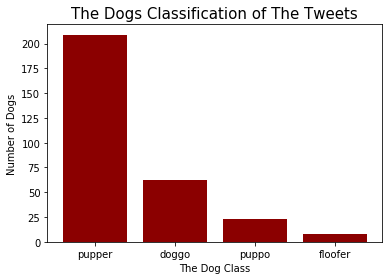

In [298]:
plt.bar(df_twitter_master['dog_class'].value_counts().index, df_twitter_master['dog_class'].value_counts(), color='darkred')
plt.xlabel('The Dog Class')
plt.ylabel('Number of Dogs')
plt.title('The Dogs Classification of The Tweets', fontsize = 15);

> **The `pupper` dogs is the highest dog class, then `doggo`, `puppo` and `floofer`**

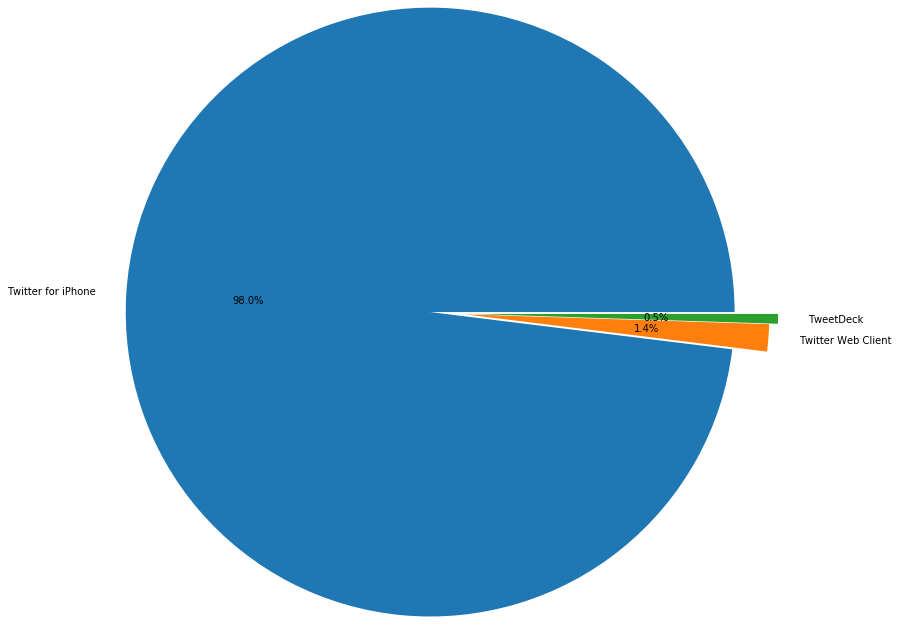

In [299]:
labels = 'Twitter for iPhone', 'Twitter Web Client', 'TweetDeck'

plt.pie(df_twitter_master['source'].value_counts(), explode=(0.3, 0.1, 0.2), labels=labels, autopct='%1.1f%%', radius=3.5);

> **The tweets sent via iPhone represent 98% "The highest", then 1.4% by TweetDeck and 0.5% by Twitter Web Client.**

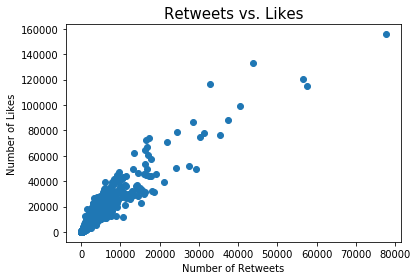

In [300]:
plt.scatter(df_twitter_master['retweets'], df_twitter_master['likes'])
plt.xlabel('Number of Retweets')
plt.ylabel('Number of Likes')
plt.title('Retweets vs. Likes', fontsize = 15);

> **There is a positave correlation between number of retweets and number of likes**

_______________________________________________________________________________________________________________________________

### Insights:

- The highest number of retweets is **77572**, and the highest number of likes is **155747**, which both on the same tweet! the tweet with ID: **744234799360020481**.
- The average retweet of all tweets is **2464**, and the average likes is **8309**.
- The **pupper** dogs are the most dogs we have, compared with all dogs classifications.
- Most tweets have been sent by **iPhone**! by **98%**.
- The tweets interval is from **2015-11-15** until **2017-08-01**.
- The average rating of all tweets is about **11.65/10**.
- There is a positive correlation between retweets and likes.